<a href="https://colab.research.google.com/github/Rishilshajan/Code-Your-ML/blob/main/Iris_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
import joblib

In [42]:
#Loading the Dataset
# as_frame=True loads the data into a pandas DataFrame
iris = load_iris(as_frame=True)

In [43]:
#Printing Dataset Detailed Description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [44]:
#Printing First 5 Values of Features
print(iris.data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [45]:
#Printing First 5 values of Target Variable
print(iris.target.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [46]:
#Printing the whole Features
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [47]:
#Printing the whole dataset
print(iris)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [48]:
#Converting into a DataFrame
x = iris.data
y = iris.target
data = pd.DataFrame(x, columns = iris.feature_names)
data["Iris Class"] = y
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Iris Class  
0           0  
1           0  
2           0  
3           0  
4           0  


In [49]:
#Printing Dataset Information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris Class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [50]:
#Checking any null Values present or not columnwise
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Iris Class           0
dtype: int64


In [51]:
#Prints descriptive statistics of the DataFrame's numerical columns
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  Iris Class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


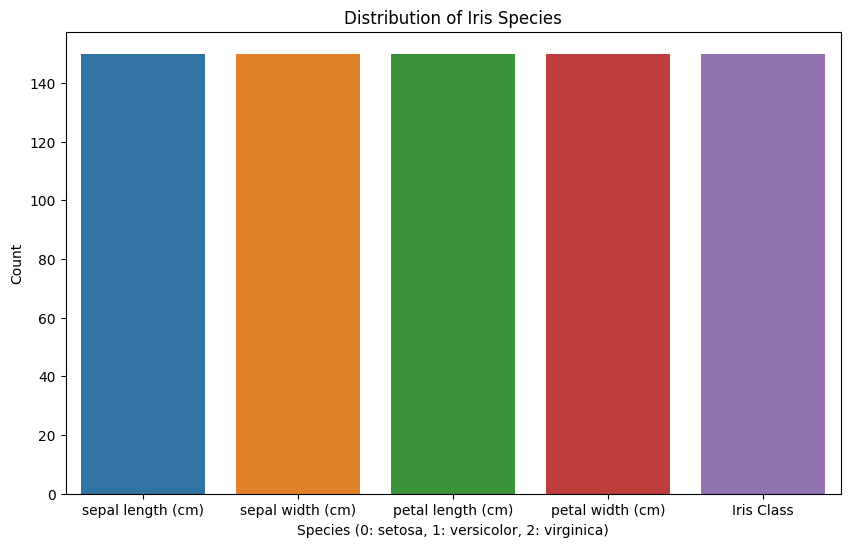

In [52]:
#Counting Distribution of each column
plt.figure(figsize=(10, 6))
sns.countplot(data)
plt.title('Distribution of Iris Species')
plt.xlabel('Species (0: setosa, 1: versicolor, 2: virginica)')
plt.ylabel('Count')
plt.show()

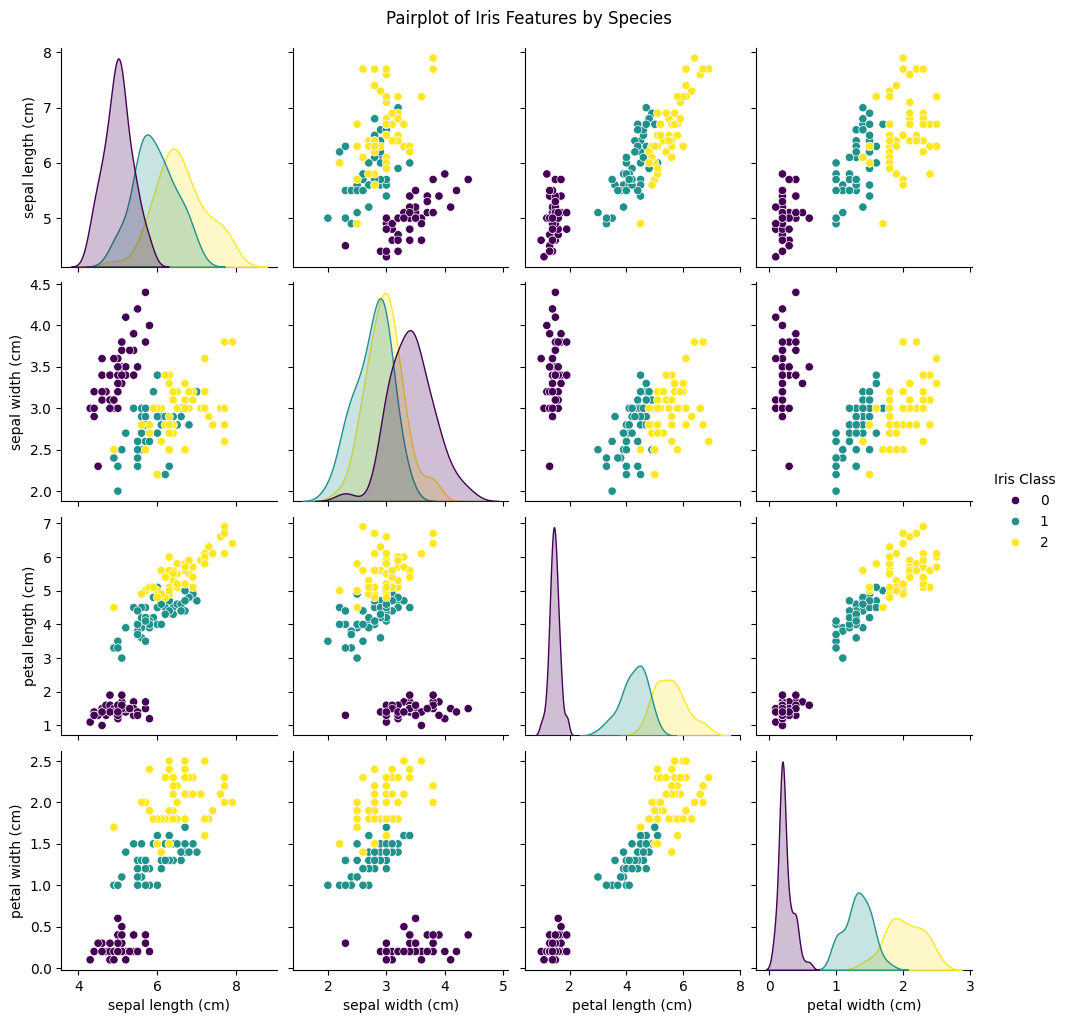

In [53]:
#Pairplot to visualize relationships between all features and how they relate to the target
sns.pairplot(data, hue='Iris Class', palette='viridis')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

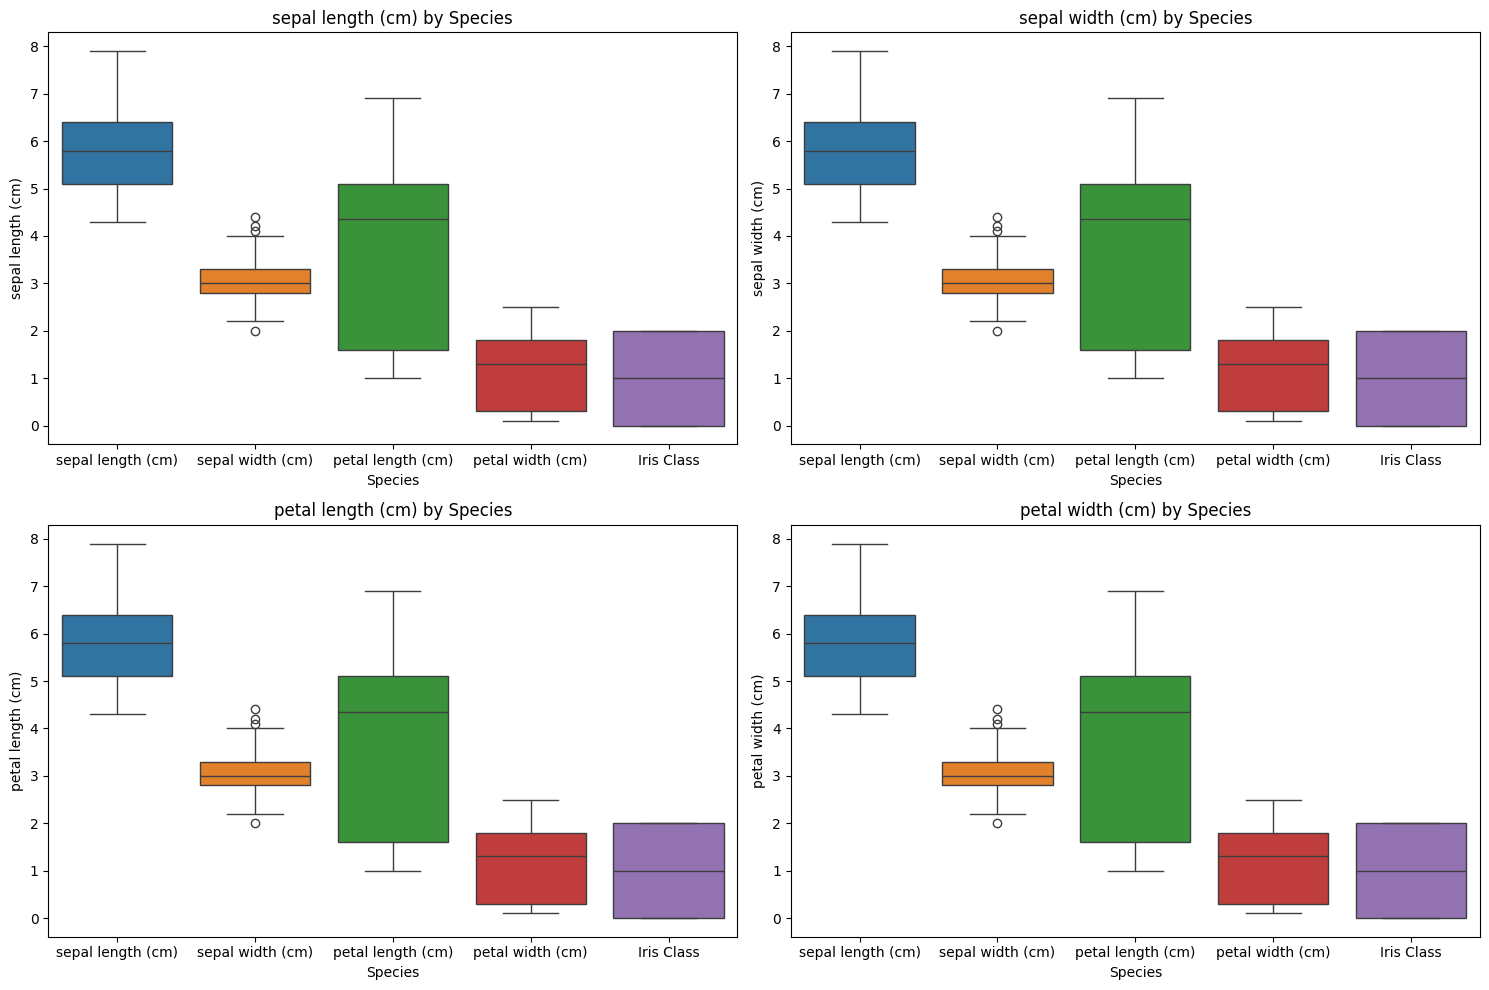

In [54]:
# Box plots for each feature grouped by target (species)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data)
    plt.title(f'{feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [55]:
#Splitting datasets into trianing and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("\n--- Model Training (Logistic Regression) ---")
print(f"Training data shape (X_train): {X_train.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")
print(f"Testing target shape (y_test: {y_test.shape}")


--- Model Training (Logistic Regression) ---
Training data shape (X_train): (120, 4)
Training target shape (y_train): (120,)
Testing data shape (X_test): (30, 4)
Testing target shape (y_test: (30,)


In [56]:
#Training the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
print("Logistic Regression Model trained successfully")

Logistic Regression Model trained successfully


In [57]:
#Print("Model Evaluation Metrics")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [58]:
#Print Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(c_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


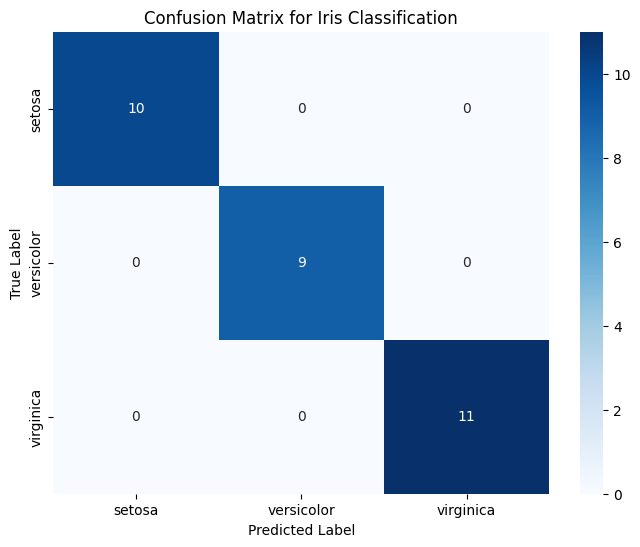

In [62]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

In [63]:
#Print Classification Report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [64]:
#Saving the Model
print("Saving the Model")
model_iris = "logistic_regression_iris_model.pkl"
joblib.dump(model, model_iris)
print(f"Model saved as {model_iris}")

Saving the Model
Model saved as logistic_regression_iris_model.pkl


In [65]:
#Loading the Model
print("Loading the saved Model")
loaded_model = joblib.load(model_iris)
print("Model loaded successfully")

Loading the saved Model
Model loaded successfully


In [74]:
#Example: Create a new input for prediction
#This should be a 2D array (or DataFrame) with the same number of features as the training data
#The order of features should be:
#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

new_data = pd.DataFrame({
    'sepal length (cm)': [5.1],
    'sepal width (cm)': [3.5],
    'petal length (cm)': [1.4],
    'petal width (cm)': [0.2]
})
print("New Flower data:")
print(new_data)

New Flower data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2


In [75]:
#Predicting the Value
predicted_species= loaded_model.predict(new_data)
predicted_species_name = iris.target_names[predicted_species[0]]
print(f"\nPredicted species for the new input (encoded): {predicted_species[0]}")
print(f"Predicted species name:  {predicted_species_name}")


Predicted species for the new input (encoded): 0
Predicted species name:  setosa


In [76]:
#Printing Prediction Probablities of each class
predicted_probabilities = loaded_model.predict_proba(new_data)
print("\nPrediction Probabilities for each class:")
for i, prob in enumerate(predicted_probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.4f}")


Prediction Probabilities for each class:
  setosa: 0.8724
  versicolor: 0.1276
  virginica: 0.0000
